我会在这里做一些关于问题数据的基本信息分析和探索性数据分析

首先，导入必要的包

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings('ignore', message='.*?numpy.*?')
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [2]:
train_data = pd.read_csv('../datasets/train.csv')
print("train data size:", train_data.shape)
train_data.head(3)

train data size: (404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0


看看数据有无缺失值

In [3]:
train_data.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

具体的缺失值是这些：

In [4]:
train_data[train_data.question1.isna() | train_data.question2.isna()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


我们可以删除这些数据，并且只要有某方的question为NaN的时候，我们都可以预测is_duplicate为0

In [5]:
train_data = train_data.dropna()
print("train data size:", train_data.shape)

train data size: (404287, 6)


数据标签分布情况：

In [6]:
train_data.is_duplicate.value_counts() / train_data.is_duplicate.count()

0    0.630799
1    0.369201
Name: is_duplicate, dtype: float64

负样本占比要高的多

句子长度的分布情况：

In [7]:
train_data['question1_len'] = train_data.question1.apply(len)
train_data['question2_len'] = train_data.question2.apply(len)
train_data[['question1_len', 'question2_len']].describe()

,question1_len,question2_len
count,404287.000000,404287.000000
mean,59.536997,60.108507
std,29.940553,33.863588
min,1.000000,1.000000
25%,39.000000,39.000000
50%,52.000000,51.000000
75%,72.000000,72.000000
max,623.000000,1169.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f5e51d0>,
      dtype=object)

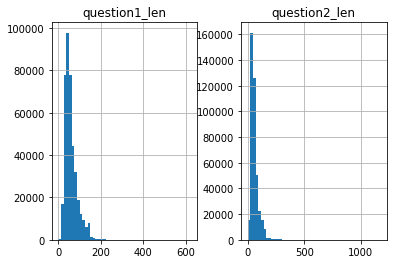

In [8]:
train_data[['question1_len', 'question2_len']].hist(bins=50)

每个句子单词数量(简单split)的分布：

In [9]:
train_data['question1_words'] = train_data.question1.apply(lambda s: s.split())
train_data['question2_words'] = train_data.question2.apply(lambda s: s.split())

In [11]:
train_data['question1_words_amount'] = train_data.question1_words.apply(len)
train_data['question2_words_amount'] = train_data.question2_words.apply(len)
train_data[['question1_words_amount', 'question2_words_amount']].describe([0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,question1_words_amount,question2_words_amount
count,404287.000000,404287.000000
mean,10.942256,11.182017
std,5.428812,6.305210
min,1.000000,1.000000
25%,7.000000,7.000000
50%,10.000000,10.000000
75%,13.000000,13.000000
80%,14.000000,14.000000
90%,18.000000,19.000000
95%,22.000000,24.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1208b62b0>,
      dtype=object)

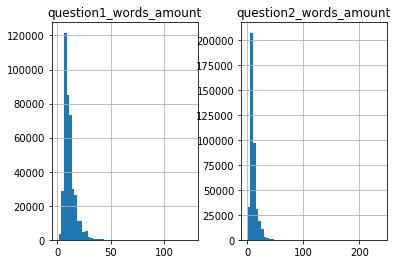

In [17]:
train_data[['question1_words_amount', 'question2_words_amount']].hist(bins=50)

In [20]:
print("question 1 words greater than 50:", train_data[train_data.question1_words_amount > 50].shape[0] / train_data.shape[0])
print("question 2 words greater than 50:", train_data[train_data.question2_words_amount > 50].shape[0] / train_data.shape[0])

question 1 words greater than 50: 0.0004600692082604684
question 2 words greater than 50: 0.0018353298523078902
